In [1]:
# Upload your Kaggle API key to Google Colab and download the dataset

# from google.colab import files
# uploaded = files.upload()
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d ashishjangra27/gender-recognition-200k-images-celeba
# !unzip gender-recognition-200k-images-celeba.zip
# !mkdir save_model

In [2]:
import os
import sys
import glob
import random
import numpy as np 
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
%matplotlib inline

In [3]:
root = os.getcwd()

In [4]:
if sys.platform == 'darwin':
    os.chdir(os.path.abspath(root)+"/Dataset")
elif os.getcwd() != '/content/Dataset':
    os.chdir("/content/Dataset")

In [5]:
image_sizes = set() #Make a set of image sizes to see if the size are consistent

for images in glob.glob("Train/*/*"):
  with Image.open(images) as img:
    image_sizes.add(img.size) 
print(image_sizes)
# We have only one size for all images. The data is consistent.

{(178, 218)}


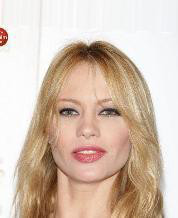

(178, 218) 0.8165137614678899


In [6]:
# Visualize random images.
random_image = random.choice(glob.glob("Train/*/*")) 

with Image.open(random_image) as img:
  imsize = img.size
  aspect_ratio = imsize[0]/imsize[1]
  display(img)
  print(img.size, aspect_ratio)

In [7]:
training_data = ImageDataGenerator(rescale=1./255, horizontal_flip = True, rotation_range=30, shear_range=0.3, zoom_range=0.3)
test_data = ImageDataGenerator(rescale=1./255)

In [8]:
WIDTH = 200

input_size = (WIDTH, int(WIDTH * aspect_ratio))
BS = 32

train_augmented = training_data.flow_from_directory('Train/', target_size=input_size, batch_size=BS, class_mode='binary')
valid_augmented = test_data.flow_from_directory('Validation/', target_size=input_size, batch_size=32, class_mode='binary')

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [9]:
input_size

(200, 163)

In [10]:
kernel_s = (5,5)
model=models.Sequential()
model.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(input_size[0], input_size[1], 3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 159, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 79, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 33, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 12, 128)       2

In [11]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [12]:
checkpoint_path = "chkpnt/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [13]:
run = model.fit(train_augmented, steps_per_epoch=60, epochs=35, validation_data=valid_augmented, validation_steps=50, callbacks=[cp_callback])

Epoch 1/35
60/60 [==============================] - 24s 385ms/step - loss: 0.9572 - acc: 0.5598 - val_loss: 0.6743 - val_acc: 0.6194

Epoch 00001: saving model to chkpnt/cp.ckpt
Epoch 2/35
60/60 [==============================] - 23s 380ms/step - loss: 0.7116 - acc: 0.5620 - val_loss: 0.6868 - val_acc: 0.6244

Epoch 00002: saving model to chkpnt/cp.ckpt
Epoch 3/35
60/60 [==============================] - 23s 375ms/step - loss: 0.6951 - acc: 0.5891 - val_loss: 0.6361 - val_acc: 0.6050

Epoch 00003: saving model to chkpnt/cp.ckpt
Epoch 4/35
60/60 [==============================] - 23s 375ms/step - loss: 0.6758 - acc: 0.6100 - val_loss: 0.5822 - val_acc: 0.7600

Epoch 00004: saving model to chkpnt/cp.ckpt
Epoch 5/35
60/60 [==============================] - 22s 374ms/step - loss: 0.6096 - acc: 0.6706 - val_loss: 0.5782 - val_acc: 0.7300

Epoch 00005: saving model to chkpnt/cp.ckpt
Epoch 6/35
60/60 [==============================] - 22s 374ms/step - loss: 0.5767 - acc: 0.7245 - val_loss: 0.

In [14]:
os.listdir(checkpoint_dir)
# model.load_weights(checkpoint_dir)

['cp.ckpt.data-00000-of-00001',
 'checkpoint',
 'my_checkpoint.data-00000-of-00001',
 'my_checkpoint.index',
 'my_model.h5',
 'variables',
 'saved_model.pb',
 'assets',
 'cp.ckpt.index']

In [15]:
# Downloading from Google colab
# !zip -r /content/file.zip /content/save_model

# files.download('save_model/.index')
# files.download('save_model/.data-00000-of-00001')
# files.download('save_model/checkpoint')

In [16]:
run.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [17]:
training_accuracy = run.history['acc']
training_loss = run.history['loss']
valid_loss = run.history['val_loss']
valid_acc = run.history['val_acc']
var2str = lambda obj,namespace: [" ".join(name.title().split('_')) for name in namespace if namespace[name] is obj][0]

In [18]:
def plot_acc_vs_loss(acc, loss):
    plt.plot(acc, c='red', label=var2str(acc,globals()))
    plt.plot(loss, c='green', label=var2str(loss,globals()))
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy and Loss")
    plt.legend(loc=7)
    plt.show()

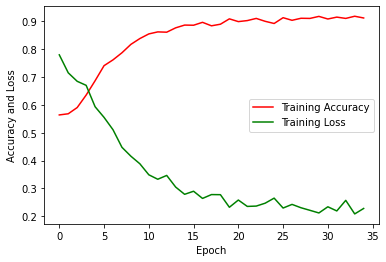

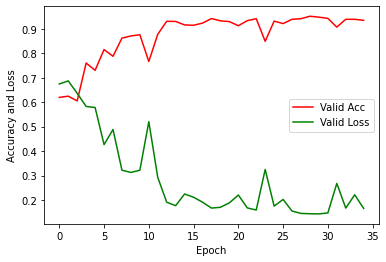

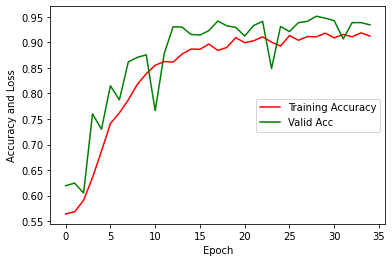

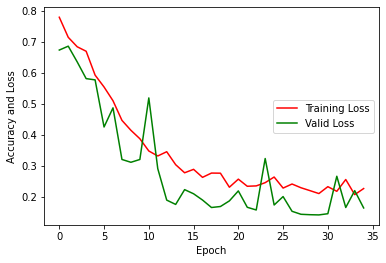

In [19]:
plot_acc_vs_loss(training_accuracy, training_loss)
plot_acc_vs_loss(valid_acc, valid_loss)
plot_acc_vs_loss(training_accuracy, valid_acc)
plot_acc_vs_loss(training_loss, valid_loss)